In [1]:
import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import Matrix
from sympy.interactive import printing
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify, implemented_function
printing.init_printing(use_latex=True)
#Redefine numpy functions
cos = np.cos
sin = np.sin
pi = np.pi

#Redefine sympy functions
scos = sp.cos
ssin = sp.sin

# "qt" realiza el gráfico en una ventana nueva
%matplotlib qt
#%matplotlib inline

In [2]:
#Funciones de rotación canonicas con valores simbolicos
def srotx(ang):
    Rx=sp.Matrix([[1,0,0],
                  [0,sp.cos(ang),-sp.sin(ang)],
                  [0, sp.sin(ang), sp.cos(ang)]])
    return Rx
def sroty(ang):
    Ry= sp.Matrix([[sp.cos(ang),0,sp.sin(ang)],
                  [0,1,0],
                  [-sp.sin(ang), 0, sp.cos(ang)]])
    return Ry
def srotz(ang):
    Rz= sp.Matrix([[sp.cos(ang),-sp.sin(ang),0],
                  [sp.sin(ang), sp.cos(ang), 0],
                  [0,0,1]])
    return Rz


#T given t,R
def T_tR(t,R):
    T = np.vstack((np.hstack((R,t)),np.array([[0, 0, 0, 1]])))
    return T
def rotdh(d,th,a,alf):
    T=sp.Matrix([[scos(th),-scos(alf)*ssin(th),ssin(alf)*ssin(th),a*scos(th)],
                  [ssin(th),scos(alf)*scos(th),-ssin(alf)*scos(th),a*ssin(th)],
                  [0, ssin(alf), scos(alf),d],[0, 0, 0, 1]])
    return T

In [20]:
def get_coeffs(ec_m, v_m, type = 's'):

	nv = v_m.shape[0]
	n_ec = ec_m.shape[0]

	coeffs = sp.zeros(n_ec,nv)

	for i in range(n_ec):
		for j in range(nv):
			coeffs[i,j] = (ec_m[i].evalf()).coeff(v_m[j,0])

	if type == 'n':
		n_coeffs = np.array(coeffs.tolist()).astype(np.float64)
		return n_coeffs
	elif type == 's':
		return coeffs

### Ejercicio 1

In [4]:
# Datos:
# 1. q(0) = 20°
# 2. q(4) = 80°
# 3. dq(0) = 0 °/s
# 4. dq(4) = 5 °/s

#Polinomios de tercer orden
# q(t) = a_3*t^3 + a_2*t^2 + a_1*t + a_0
# dq(t) = 3*a_3*t^2 + 2*a_2*t + a_1

# Reemplazando
# 1. 20 = a_0
# 2. 80 = a_3*4^3 + a_2*4^2 + a_1*4 + a_0
# 3. 0 = a_1
# 4. 5 = 3*a_3*4^2 + 2*a_2*4 + a_1

#Variables simbolicas
t = sp.symbols("t")
a0, a1, a2, a3 = sp.symbols("a_0 a_1 a_2 a_3")

#Polinomio
q = a3*t**3 + a2*t**2 + a1*t + a0
print("q(t): "); display(q)

#Resolviendo como sistema de ecuaciones
A = np.array([[1, 0, 0 ,0],
       [1, 4, 4**2, 4**3],
       [0, 1, 0, 0],
       [0, 1, 2*4, 3*(4**2)]])

B = np.array([[20],[80],[0],[5]])

a_p = np.dot(np.linalg.inv(A),B)

#Respuesta
print("Coeficentes del polinomio de tercer orden (a0, a1, a2, a3): "); print(a_p)
print("")
print("Polinomio hallado, \nq(t): "); display(q.subs({a0: a_p[0,0], a1: a_p[1,0], a2: a_p[2,0], a3: a_p[3,0]}))

q(t): 


Coeficentes del polinomio de tercer orden (a0, a1, a2, a3): 
[[20.    ]
 [ 0.    ]
 [10.    ]
 [-1.5625]]

Polinomio hallado, 
q(t): 


### Ejercicio 2

In [5]:
#Datos
# 1. t_0 = 1, t_1 = 3, t_2 = 6
# 1. s(1) = 0.2, ds(1) = 0, dds(1) = 0
# 2. s(6) = 0.8, ds(6) = 0, dds(6) = 0
# 3. s(3-) = s(3+), ds(3-) = ds(3+)

#Variables simbolicas
t = sp.symbols("t")
a0, a1, a2, a3, a4, a5, a6, a7 = sp.symbols("a_0 a_1 a_2 a_3 a_4 a_5 a_6 a_7")
a_v = sp.Matrix([[a0, a1, a2, a3, a4, a5, a6, a7]]).T

#Expresiones de s y sus derivadas
s1 = a3*t**3 + a2*t**2 + a1*t + a0
s2 = a7*t**3 + a6*t**2 + a5*t + a4
ds1 = sp.diff(s1,t)
ds2 = sp.diff(s2,t)
dds1 = sp.diff(ds1,t)
dds2 = sp.diff(ds2,t)

print("Polinomios")
print("s(t), 1 <= t <= 3"); display(s1)
print("s(t), 3 <= t <= 6"); display(s2)

tr_ec = sp.Matrix([[s1.subs({t: 1})],
                  [s2.subs({t: 6})],
                  [ds1.subs({t: 1})],
                  [ds2.subs({t: 6})],
                  [dds1.subs({t: 1})],
                  [dds2.subs({t: 6})],
                  [s1.subs({t: 3}) - s2.subs({t: 3})],
                  [ds1.subs({t: 3}) - ds2.subs({t: 3})]])

A = get_coeffs(tr_ec, a_v, 'n')
B = np.array([[0.2, 0.8, 0, 0, 0, 0, 0, 0]]).T
a_c = np.dot(np.linalg.inv(A),B)

#Respuesta
print("Coeficentes de los polinomios de tercer orden (a0, a1, a2, a3, a4, a5, a6, a7): "); print(a_c)
print("")
a_p = np.round(a_c,3)
print("Polinomios hallados: "); 
print("")
print("s(t), 1 <= t <= 3");  display(s1.subs({a0: a_p[0,0], a1: a_p[1,0], a2: a_p[2,0], a3: a_p[3,0]}))
print("s(t), 3 <= t <= 6");  display(s2.subs({a4: a_p[4,0], a5: a_p[5,0], a6: a_p[6,0], a7: a_p[7,0]}))

Polinomios
s(t), 1 <= t <= 3


s(t), 3 <= t <= 6


Coeficentes de los polinomios de tercer orden (a0, a1, a2, a3, a4, a5, a6, a7): 
[[ 0.17      ]
 [ 0.09      ]
 [-0.09      ]
 [ 0.03      ]
 [-2.08      ]
 [ 1.44      ]
 [-0.24      ]
 [ 0.01333333]]

Polinomios hallados: 

s(t), 1 <= t <= 3


s(t), 3 <= t <= 6


### Ejercicio 3 

In [7]:
#Datos
ddq_max = 2.5
dq_max = 2
q0 = -1.5
qf = 1.5

#Hallar tf y tb en función de ddq_max
tf = 2*np.sqrt((qf-q0)/ddq_max)
tb = tf/2
#Hallar dq maxima
dq_max_f = ddq_max*tb
print("dq_max hallada: {}".format(dq_max_f))
print("dq_max hallada es mayor a dq_max de dato")
print("")

#Hallar tf y tb en función de dq_max
tf = 4*((qf-q0)/(2*dq_max))
tb = tf/2
#Hallar ddq maxima
ddq_max_f = dq_max/tb
print("ddq_max hallada: {}".format(ddq_max_f))
print("Se satisface la aceleracion maxima")

#Trayectorias
#t, tf, q0, qf, ddq_max = sp.symbols("t t_f q_0 q_f \ddot{q}_{max}") 
t = sp.symbols("t")
#Ecuaciones de trayectoria simbolicas
q_t1 = q0 + 0.5*ddq_max_f*t**2
q_t2 = qf - 0.5*ddq_max_f*(t-tf)**2
dq_t1 = sp.diff(q_t1,t)
dq_t2 = sp.diff(q_t2,t)
ddq_t1 = sp.diff(dq_t1,t)
ddq_t2 = sp.diff(dq_t2,t)

dq_max hallada: 2.73861278752583
dq_max hallada es mayor a dq_max de dato

ddq_max hallada: 1.3333333333333333
Se satisface la aceleracion maxima


In [8]:

N = 10000 #Numero de puntos 
t_v = np.linspace(0,tf,N) #Vector de tiempo

#Vectores para guadar q, dq y ddq
q_vector = np.zeros((N,1))
dq_vector = np.zeros((N,1))
ddq_vector = np.zeros((N,1))

#Transformar funciones simbolicas a numericas
q1_f = lambdify(t, q_t1)
q2_f = lambdify(t, q_t2)
dq1_f = lambdify(t, dq_t1)
dq2_f = lambdify(t, dq_t2)
ddq1_f = lambdify(t, ddq_t1)
ddq2_f = lambdify(t, ddq_t2)

#Generación de q, dq, ddq para t
for i in range(len(t_v)):
    
    if t_v[i] >= 0 and t_v[i] <= tb:
    
        q = q1_f(t_v[i])
        dq = dq1_f(t_v[i])
        ddq = ddq1_f(t_v[i])
    
    elif t_v[i] > tb and t_v[i] <= tf:
    
        q = q2_f(t_v[i])
        dq = dq2_f(t_v[i])
        ddq = ddq2_f(t_v[i])
    
    q_vector[i,:] = q
    dq_vector[i,:] = dq
    ddq_vector[i,:] = ddq

ddq_vector[0,0] = 0
ddq_vector[N-1,0] = 0

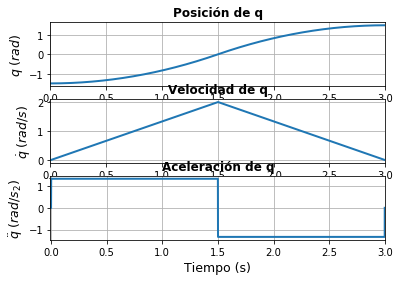

In [9]:
#Graficos
fig, axs = plt.subplots(3, 1)

axs[0].plot(t_v, q_vector[0:N,0],linewidth=2)
axs[0].set_title('Posición de q',fontweight="bold")
#axs[0].set(xlabel='Tiempo (s)', ylabel='$q$ $(rad)$')
axs[0].set_ylabel('$q$ $(rad)$', fontsize=12.5)
axs[0].set_xlim([0,3])
axs[0].grid();

axs[1].plot(t_v, dq_vector[0:N,0],linewidth=2)
axs[1].set_title('Velocidad de q',fontweight="bold")
#axs[1].set(xlabel='Tiempo (s)', ylabel='$\dot{q}$ $(rad/s)$')
axs[1].set_ylabel('$\dot{q}$ $(rad/s)$', fontsize=12.5)
axs[1].set_xlim([0,3])
axs[1].grid();

axs[2].plot(t_v, ddq_vector[0:N,0],linewidth=2)
axs[2].set_title('Aceleración de q',fontweight="bold")
axs[2].set_xlabel('Tiempo (s)', fontsize=12.5)
axs[2].set_ylabel('$\ddot{q}$ $(rad/s_2)$', fontsize=12.5)
#axs[2].set(xlabel='Tiempo (s)', ylabel='$\ddot{q}$ $(rad/s_2)$')
axs[2].set_xlim([-0.005,3.005])
axs[2].grid();

#### Ejercicio 4

Generar una trayectoria con ajuste parab´olico a trav´es de los puntos q1 = 0, q2 = 2π y
q3 = π/2 en los tiempos t1 = 0, t2 = 2 y t3 = 3, con velocidades inicial y final nulas.
Considerar una duraci´on de 0.6 s como duraci´on de la par´abola (blending time). Graficar
la trayectoria resultante


In [10]:
#Valores de t y q(t)
t1 = 0; q1 = 0
t2 = 2; q2 = 2*pi
t3 = 3; q3 = pi/2

#Blending time
bt = 0.6
bt_2 = 0.6/2
#Tiempo final
tf = t3

t = sp.symbols("t")

#Ecuaciones de q(t)
#Primer tramo 0 <= t <= 2
tb1 = bt_2
tf1 = t2
dq_max1 = (q1-q2)/(tb1-tf1)
q_t11 = q1 + 0.5*(dq_max1/tb1)*t**2
q_t12 = q1 - 0.5*tb1*dq_max1 + dq_max1*t
q_t13 = q2 - 0.5*(dq_max1/tb1)*(t-tf1)**2

#Primer tramo 0 <= t <= 2
tb2 = tf1 + bt_2
tf2 = tf
dq_max2 = (q2-q3)/(tb2-tf2)
q_t21 = q2 + 0.5*(dq_max2/bt_2)*(t-tf1)**2
q_t22 = q2 - 0.5*bt_2*dq_max2 + dq_max2*(t-tf1)
q_t23 = q3 - 0.5*(dq_max2/bt_2)*(t-tf2)**2

In [11]:
N = 10000 #Numero de puntos 
t_v = np.linspace(0,tf,N) #Vector de tiempo

#Vectores para guadar q, dq y ddq
q_vector = np.zeros((N,1))

#Transformar funciones simbolicas a numericas
q11_f = lambdify(t, q_t11)
q12_f = lambdify(t, q_t12)
q13_f = lambdify(t, q_t13)
q21_f = lambdify(t, q_t21)
q22_f = lambdify(t, q_t22)
q23_f = lambdify(t, q_t23)

#Generación de q, dq, ddq para t
for i in range(len(t_v)):
    
    if t_v[i] >= 0 and t_v[i] <= tb1:   
        q = q11_f(t_v[i])
    
    elif t_v[i] > tb1 and t_v[i] <= tf1-tb1:  
        q = q12_f(t_v[i])

    elif t_v[i] > tf1-tb1 and t_v[i] <= tf1:  
        q = q13_f(t_v[i])
        
    elif t_v[i] > tf1 and t_v[i] <= tb2:  
        q = q21_f(t_v[i])
        
    elif t_v[i] > tb2 and t_v[i] <= tf2-bt_2:  
        q = q22_f(t_v[i])
        
    elif t_v[i] > tf2-bt_2 and t_v[i] <= tf:  
        q = q23_f(t_v[i])

    q_vector[i,:] = q

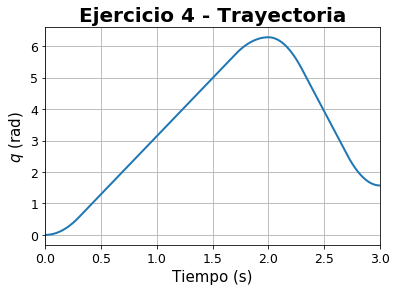

In [12]:
#Grafico de trayectoria - Ejercicio 4
plt.figure(2)
plt.plot(t_v, q_vector[0:N,0], linewidth = 2)
plt.title('Ejercicio 4 - Trayectoria', fontsize = 20, fontweight="bold")
plt.xlabel('Tiempo (s)', fontsize = 15)
plt.ylabel('$q$ (rad)', fontsize = 15)
plt.xlim([t1,t3])
plt.tick_params(labelsize=12.5)
plt.grid()
plt.show()

#### Ejercicio 5

Se tiene los siguientes puntos: q1 = 0, q2 = 2π, q3 = π/2 y q4 = π en los tiempos t1 = 0,
t2 = 2, t3 = 3 y t4 = 5. Se desea que las velocidades al inicio de la trayectoria y al final de
la misma sean nulas. Determinar una trayectoria de tipo spline que pase por los 4 puntos
mencionados. Graficar la trayectoria y la velocidad.


In [22]:

#Variables simbolicas
t = sp.symbols("t")
a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11 = sp.symbols("a_0 a_1 a_2 a_3 a_4 a_5 a_6 a_7 a_8 a_9 a_10 a_11")
a_v = sp.Matrix([[a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11]]).T

#Valores de t y q(t)
t1 = 0; q1 = 0
t2 = 2; q2 = 2*pi
t3 = 3; q3 = pi/2
t4 = 5; q4 = pi

#Expresiones de s y sus derivadas
q_t1 = a3*t**3 + a2*t**2 + a1*t + a0
q_t2 = a7*t**3 + a6*t**2 + a5*t + a4
q_t3 = a11*t**3 + a10*t**2 + a9*t + a8
dq_t1 = sp.diff(q_t1,t)
dq_t2 = sp.diff(q_t2,t)
dq_t3 = sp.diff(q_t3,t)
ddq_t1 = sp.diff(dq_t1,t)
ddq_t2 = sp.diff(dq_t2,t)
ddq_t3 = sp.diff(dq_t3,t)

print("Polinomios")
print("q(t), 0 <= t <= 2"); display(q_t1)
print("q(t), 2 <= t <= 3"); display(q_t2)
print("q(t), 3 <= t <= 5"); display(q_t3)

#Matriz de valores conocidos y restricciones
tr_ec = sp.Matrix([[q_t1.subs({t: t1})],
                  [q_t1.subs({t: t2})],
                  [q_t2.subs({t: t2})],
                  [q_t2.subs({t: t3})],
                  [q_t3.subs({t: t3})],
                  [q_t3.subs({t: t4})],
                  [dq_t1.subs({t: t1})],
                  [dq_t3.subs({t: t4})],
                  [dq_t1.subs({t: t2}) - dq_t2.subs({t: t2})],
                  [ddq_t1.subs({t: t2}) - ddq_t2.subs({t: t2})],
                  [dq_t2.subs({t: t3}) - dq_t3.subs({t: t3})],
                  [ddq_t2.subs({t: t3}) - ddq_t3.subs({t: t3})]])

A = get_coeffs(tr_ec, a_v, 'n')
B = np.array([[q1, q2, q2, q3, q3, q4, 0, 0, 0, 0, 0, 0]]).T
a_c = np.dot(np.linalg.inv(A),B)

#Respuesta
print("Coeficentes de los polinomios de tercer orden (a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11): "); print(a_c)
print("")
a_p = np.round(a_c,4)
print("Polinomios hallados: "); 
print("")
print("q(t), 0 <= t <= 2");  display(q_t1.subs({a0: a_p[0,0], a1: a_p[1,0], a2: a_p[2,0], a3: a_p[3,0]}))
print("q(t), 2 <= t <= 3");  display(q_t2.subs({a4: a_p[4,0], a5: a_p[5,0], a6: a_p[6,0], a7: a_p[7,0]}))
print("q(t), 3 <= t <= 5");  display(q_t3.subs({a8: a_p[8,0], a9: a_p[9,0], a10: a_p[10,0], a11: a_p[11,0]}))

Polinomios
q(t), 0 <= t <= 2


q(t), 2 <= t <= 3


q(t), 3 <= t <= 5


Coeficentes de los polinomios de tercer orden (a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11): 
[[  0.        ]
 [  0.        ]
 [  5.66959299]
 [ -2.04939833]
 [-47.02571503]
 [ 70.53857255]
 [-29.59969328]
 [  3.82881605]
 [ 91.80568219]
 [-68.29282468]
 [ 16.67743913]
 [ -1.31308755]]

Polinomios hallados: 

q(t), 0 <= t <= 2


q(t), 2 <= t <= 3


q(t), 3 <= t <= 5


In [23]:
#Expresiones simbolicas de los polinomios y sus derivadas
#Posicion
q_t1 = q_t1.subs({a0: a_c[0,0], a1: a_c[1,0], a2: a_c[2,0], a3: a_c[3,0]})
q_t2 = q_t2.subs({a4: a_c[4,0], a5: a_c[5,0], a6: a_c[6,0], a7: a_c[7,0]})
q_t3 = q_t3.subs({a8: a_c[8,0], a9: a_c[9,0], a10: a_c[10,0], a11: a_c[11,0]})
#Velocidad
dq_t1 = sp.diff(q_t1,t)
dq_t2 = sp.diff(q_t2,t)
dq_t3 = sp.diff(q_t3,t)

N = 10000 #Numero de puntos 
t_v = np.linspace(0,t4,N) #Vector de tiempo

#Vectores para guadar q, dq y ddq
q_vector = np.zeros((N,1))
dq_vector = np.zeros((N,1))

#Transformar funciones simbolicas a numericas
q_t1_f = lambdify(t, q_t1)
q_t2_f = lambdify(t, q_t2)
q_t3_f = lambdify(t, q_t3)
dq_t1_f = lambdify(t, dq_t1)
dq_t2_f = lambdify(t, dq_t2)
dq_t3_f = lambdify(t, dq_t3)

#Generación de q, dq, ddq para t
for i in range(len(t_v)):
    
    if t_v[i] >= t1 and t_v[i] <= t2: 
        q = q_t1_f(t_v[i])
        dq = dq_t1_f(t_v[i])
    
    elif t_v[i] >= t2 and t_v[i] <= t3:
        q = q_t2_f(t_v[i])
        dq = dq_t2_f(t_v[i])
    
    elif t_v[i] >= t3 and t_v[i] <= t4:
        q = q_t3_f(t_v[i])
        dq = dq_t3_f(t_v[i])
    
    q_vector[i,:] = q
    dq_vector[i,:] = dq

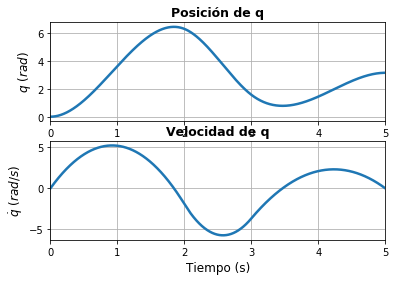

In [24]:
#Graficos
fig, axs = plt.subplots(2, 1)

axs[0].plot(t_v, q_vector[0:N,0],linewidth=2.5)
axs[0].set_title('Posición de q',fontsize=12.5,fontweight="bold")
axs[0].set_xlabel('Tiempo (s)', fontsize=12)
axs[0].set_ylabel('$q$ $(rad)$', fontsize=12)
axs[0].set_xlim([t1,t4])
#axs[0].set(xlabel='Tiempo (s)', ylabel='$q$ $(rad)$')
axs[0].tick_params(labelsize=10)
axs[0].grid();

axs[1].plot(t_v, dq_vector[0:N,0],linewidth=2.5)
axs[1].set_title('Velocidad de q',fontsize=12.5,fontweight="bold")
#axs[1].set(xlabel='Tiempo (s)', ylabel='$\dot{q}$ $(rad/s)$')
axs[1].set_xlabel('Tiempo (s)', fontsize=12)
axs[1].set_ylabel('$\dot{q}$ $(rad/s)$', fontsize=12)
axs[1].set_xlim([t1,t4])
axs[1].tick_params(labelsize=10)
axs[1].grid();

In [25]:
#Ejercicio 6
#Parte a
r = 0.1 #Radio de las ruedas
b = 5 #Distancia entre el centro del robot y la rueda
v = 2 #Velocidad lineal del robot
w = 0 #Velocidad angular del robot

#Velocidades de los motores
phi_d = (1/r)*(v+b*w)
phi_i = (1/r)*(v-b*w)

#Respuesta
print("El motor de la rueda derecha debe ir a al menos {} rad/s".format(phi_d))
print("El motor de la rueda izquierda debe ir a al menos {} rad/s".format(phi_i))

El motor de la rueda derecha debe ir a al menos 20.0 rad/s
El motor de la rueda izquierda debe ir a al menos 20.0 rad/s
